In [1]:
import numpy as np
from matplotlib import pyplot as plt
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
import torch.nn as nn

In [2]:
X_train = np.arange(10,dtype="float32").reshape((10,1))
y_train = np.array([1.0,1.3,3.1,2.0,5.0,6.3,6.6,7.4,8.0,9.0],dtype="float32")

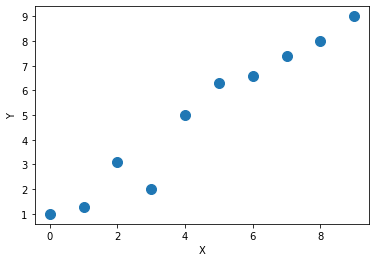

In [3]:
plt.plot(X_train, y_train,"o",markersize=10)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [4]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train)
batch_size = 1

In [5]:
train_ds

In [6]:
train_dl = DataLoader(train_ds,batch_size=batch_size,shuffle=True)

In [7]:
train_dl

In [8]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad=True)

In [9]:
def model(xb):
    return xb @ weight + bias

In [10]:
def loss_fn(input, target):
    return (input - target).pow(2).mean()

In [11]:
#manual sgd
learning_rate = 0.001
num_epochs = 200
log_epochs = 10

In [12]:
for epoch in range(num_epochs):
    for x_batch,y_batch in train_dl:
        pred = model(x_batch)
        loss = loss_fn(pred,y_batch)
        loss.backward()
    with torch.no_grad():
        weight -= weight.grad*learning_rate
        bias -= bias.grad*learning_rate
        weight.grad.zero_()
        bias.grad.zero_()
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 5.5008
Epoch 10 Loss 31.2428
Epoch 20 Loss 27.5271
Epoch 30 Loss 0.9601
Epoch 40 Loss 3.6391
Epoch 50 Loss 5.9984
Epoch 60 Loss 3.8104
Epoch 70 Loss 1.5914
Epoch 80 Loss 0.6104
Epoch 90 Loss 1.5627
Epoch 100 Loss 0.2550
Epoch 110 Loss 0.6917
Epoch 120 Loss 0.2630
Epoch 130 Loss 0.1589
Epoch 140 Loss 0.5990
Epoch 150 Loss 0.0634
Epoch 160 Loss 0.1160
Epoch 170 Loss 0.3468
Epoch 180 Loss 0.3250
Epoch 190 Loss 0.0954


In [13]:
print(f"Final paramters are :: Weight --> {weight.item()} and Bias --> {bias.item()}")


Final paramters are :: Weight --> 2.670930862426758 and Bias --> 4.88258695602417


In [14]:
X_test = np.linspace(0,9,num=100, dtype="float32").reshape(-1,1)
X_test_norm = (X_test - np.mean(X_test)) / np.std(X_test)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()

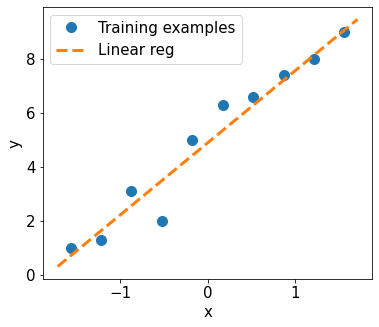

In [15]:
fig = plt.figure(figsize=(13,5))
ax = fig.add_subplot(1,2,1)
plt.plot(X_train_norm,y_train,'o',markersize=10)
plt.plot(X_test_norm,y_pred,"--",lw=3)
plt.legend(["Training examples","Linear reg"],fontsize = 15)
ax.set_xlabel('x',size=15)
ax.set_ylabel('y',size=15)
ax.tick_params(axis="both",which="major",labelsize=15)
plt.show()

In [16]:
#model training using nn.module and torch.optim
loss_fn = nn.MSELoss(reduction="mean")
input_size = 1
output_size = 1
model = nn.Linear(input_size,output_size)
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

In [17]:
for epoch in range(num_epochs):
    for x_batch, y_batch in train_dl:
        #generate_predictions
        pred = model(x_batch)[:,0]
        #Calculate loss
        loss = loss_fn(pred, y_batch)
        #compute gradients
        loss.backward()
        #update params using gradients
        optimizer.step()
        #reset gradients to zero
        optimizer.zero_grad()
    if epoch % log_epochs == 0:
        print(f'Epoch {epoch} Loss {loss.item():.4f}')

Epoch 0 Loss 38.7543
Epoch 10 Loss 2.0970
Epoch 20 Loss 30.4347
Epoch 30 Loss 0.7147
Epoch 40 Loss 13.1391
Epoch 50 Loss 6.6279
Epoch 60 Loss 4.2347
Epoch 70 Loss 4.7506
Epoch 80 Loss 1.1948
Epoch 90 Loss 1.4845
Epoch 100 Loss 0.2175
Epoch 110 Loss 1.0143
Epoch 120 Loss 0.1618
Epoch 130 Loss 0.7065
Epoch 140 Loss 1.4043
Epoch 150 Loss 0.0693
Epoch 160 Loss 0.2174
Epoch 170 Loss 0.0928
Epoch 180 Loss 0.0979
Epoch 190 Loss 0.0005


In [18]:
print(f"Final paramters are :: Weight --> {model.weight.item()} and Bias --> {model.bias.item()}")


Final paramters are :: Weight --> 2.6650238037109375 and Bias --> 4.877845287322998
